In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/extrovert-vs-introvert-behavior-data/personality_datasert.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df= pd.read_csv("personality_datasert.csv")
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4,No,8.0,5.0,Extrovert


In [3]:
df.shape

(2900, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   int64  
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 181.4+ KB


In [5]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.441180,2.872608,2.221597,4.232340,2.893587
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.963354,3.000000,5.000000,3.000000
75%,7.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [6]:
print("\nUnique values in categorical columns:")
print("Stage_fear:", df['Stage_fear'].unique())
print("Drained_after_socializing:", df['Drained_after_socializing'].unique())
print("Personality:", df['Personality'].unique())


Unique values in categorical columns:
Stage_fear: ['No' 'Yes']
Drained_after_socializing: ['No' 'Yes']
Personality: ['Extrovert' 'Introvert']


In [7]:
print(df['Personality'].value_counts())

Personality
Extrovert    1491
Introvert    1409
Name: count, dtype: int64


## DATA PREPROCESSING

### 1. convert categorical to nmeric

In [8]:
df['Stage_fear'] = df['Stage_fear'].map({'Yes': 1, 'No': 0})
df['Drained_after_socializing'] = df['Drained_after_socializing'].map({'Yes': 1, 'No': 0})

# Map target labels
df['Personality'] = df['Personality'].map({'Introvert': 1, 'Extrovert': 0})

In [9]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6,0,13.0,5.0,0
1,9.0,1,0.0,0,1,0.0,3.0,1
2,9.0,1,1.0,2,1,5.0,2.0,1
3,0.0,0,6.0,7,0,14.0,8.0,0
4,3.0,0,9.0,4,0,8.0,5.0,0


### 2. Null values

In [10]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64


### 3.Feature Scaling

In [11]:
from sklearn.model_selection import train_test_split
# Define features and target
X = df.drop('Personality', axis=1)
y = df['Personality']

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [12]:
x_train.shape , x_test.shape

((2030, 7), (870, 7))

In [13]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(x_train)

x_train_scaled= scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)
scaler.mean_

array([4.44814702, 0.48226601, 3.97857021, 3.00492611, 0.48226601,
       6.26169938, 3.58409779])

In [14]:
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=x_test.columns)

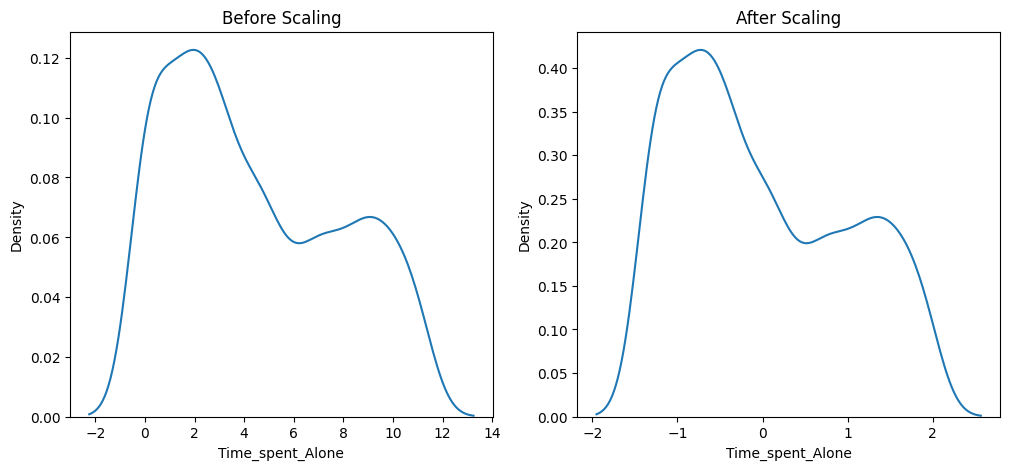

In [15]:
#plot pdf
#BEFORE SCALING
import matplotlib.pyplot as plt
import seaborn as sns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Before scaling
ax1.set_title("Before Scaling")
sns.kdeplot(x_train['Time_spent_Alone'], ax=ax1)

# After scaling
ax2.set_title("After Scaling")
sns.kdeplot(x_train_scaled_df['Time_spent_Alone'], ax=ax2)

plt.show()

### Outliers detection

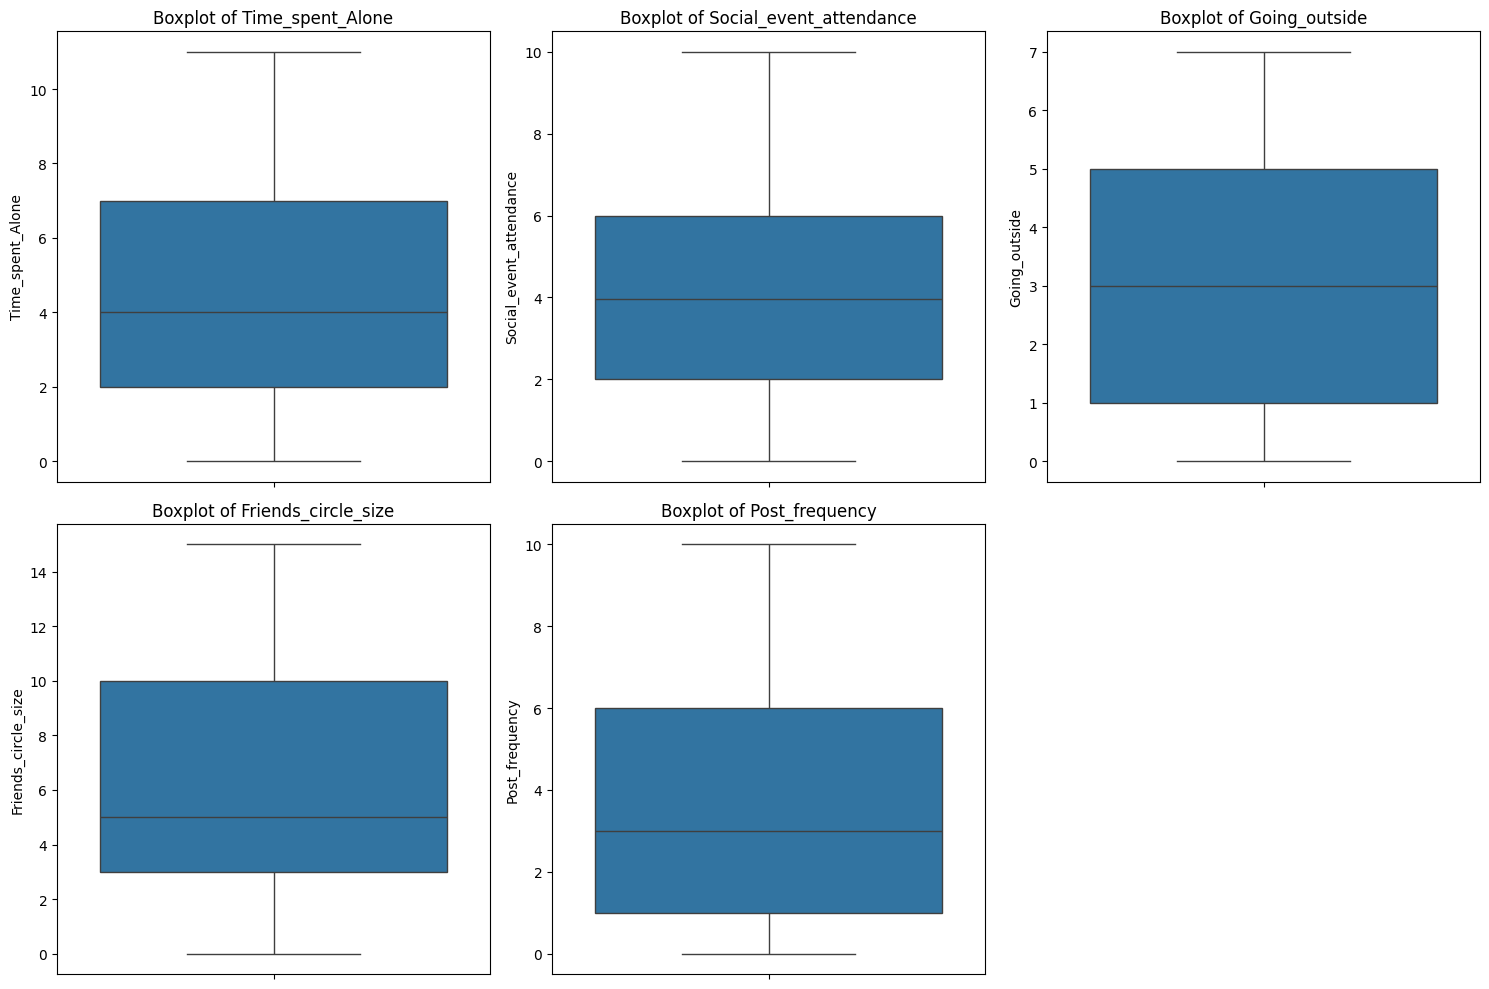

In [16]:
# Plot boxplots for each numeric feature
numeric_columns = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
                   'Friends_circle_size', 'Post_frequency']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df, y=col)
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

## EDA

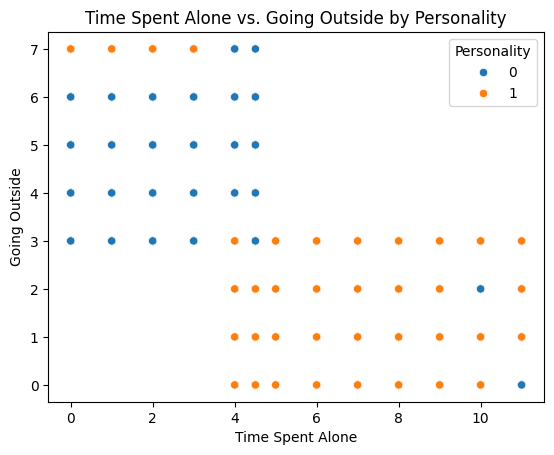

In [17]:
sns.scatterplot(x='Time_spent_Alone', y='Going_outside', hue='Personality', data=df)
plt.title('Time Spent Alone vs. Going Outside by Personality')
plt.xlabel('Time Spent Alone')
plt.ylabel('Going Outside')
plt.show()

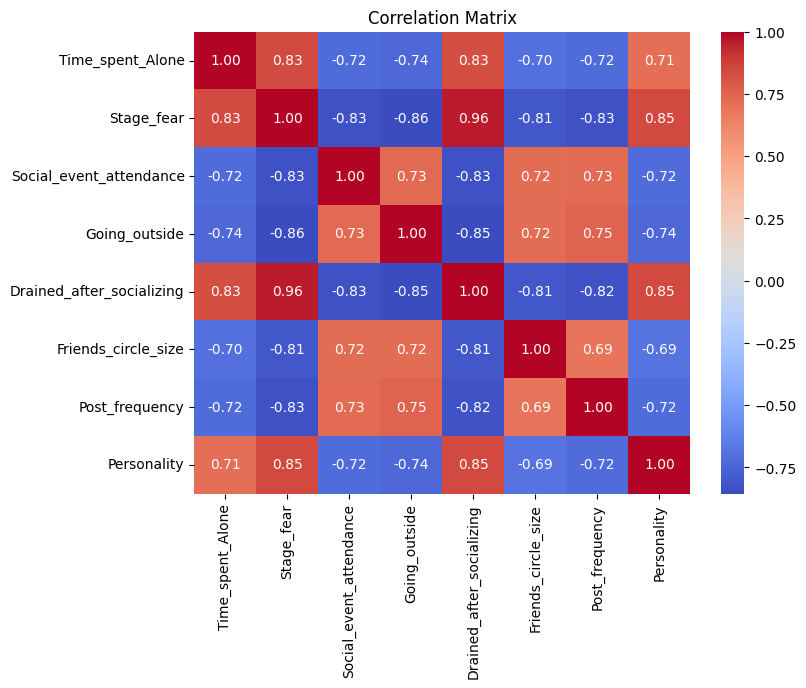

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


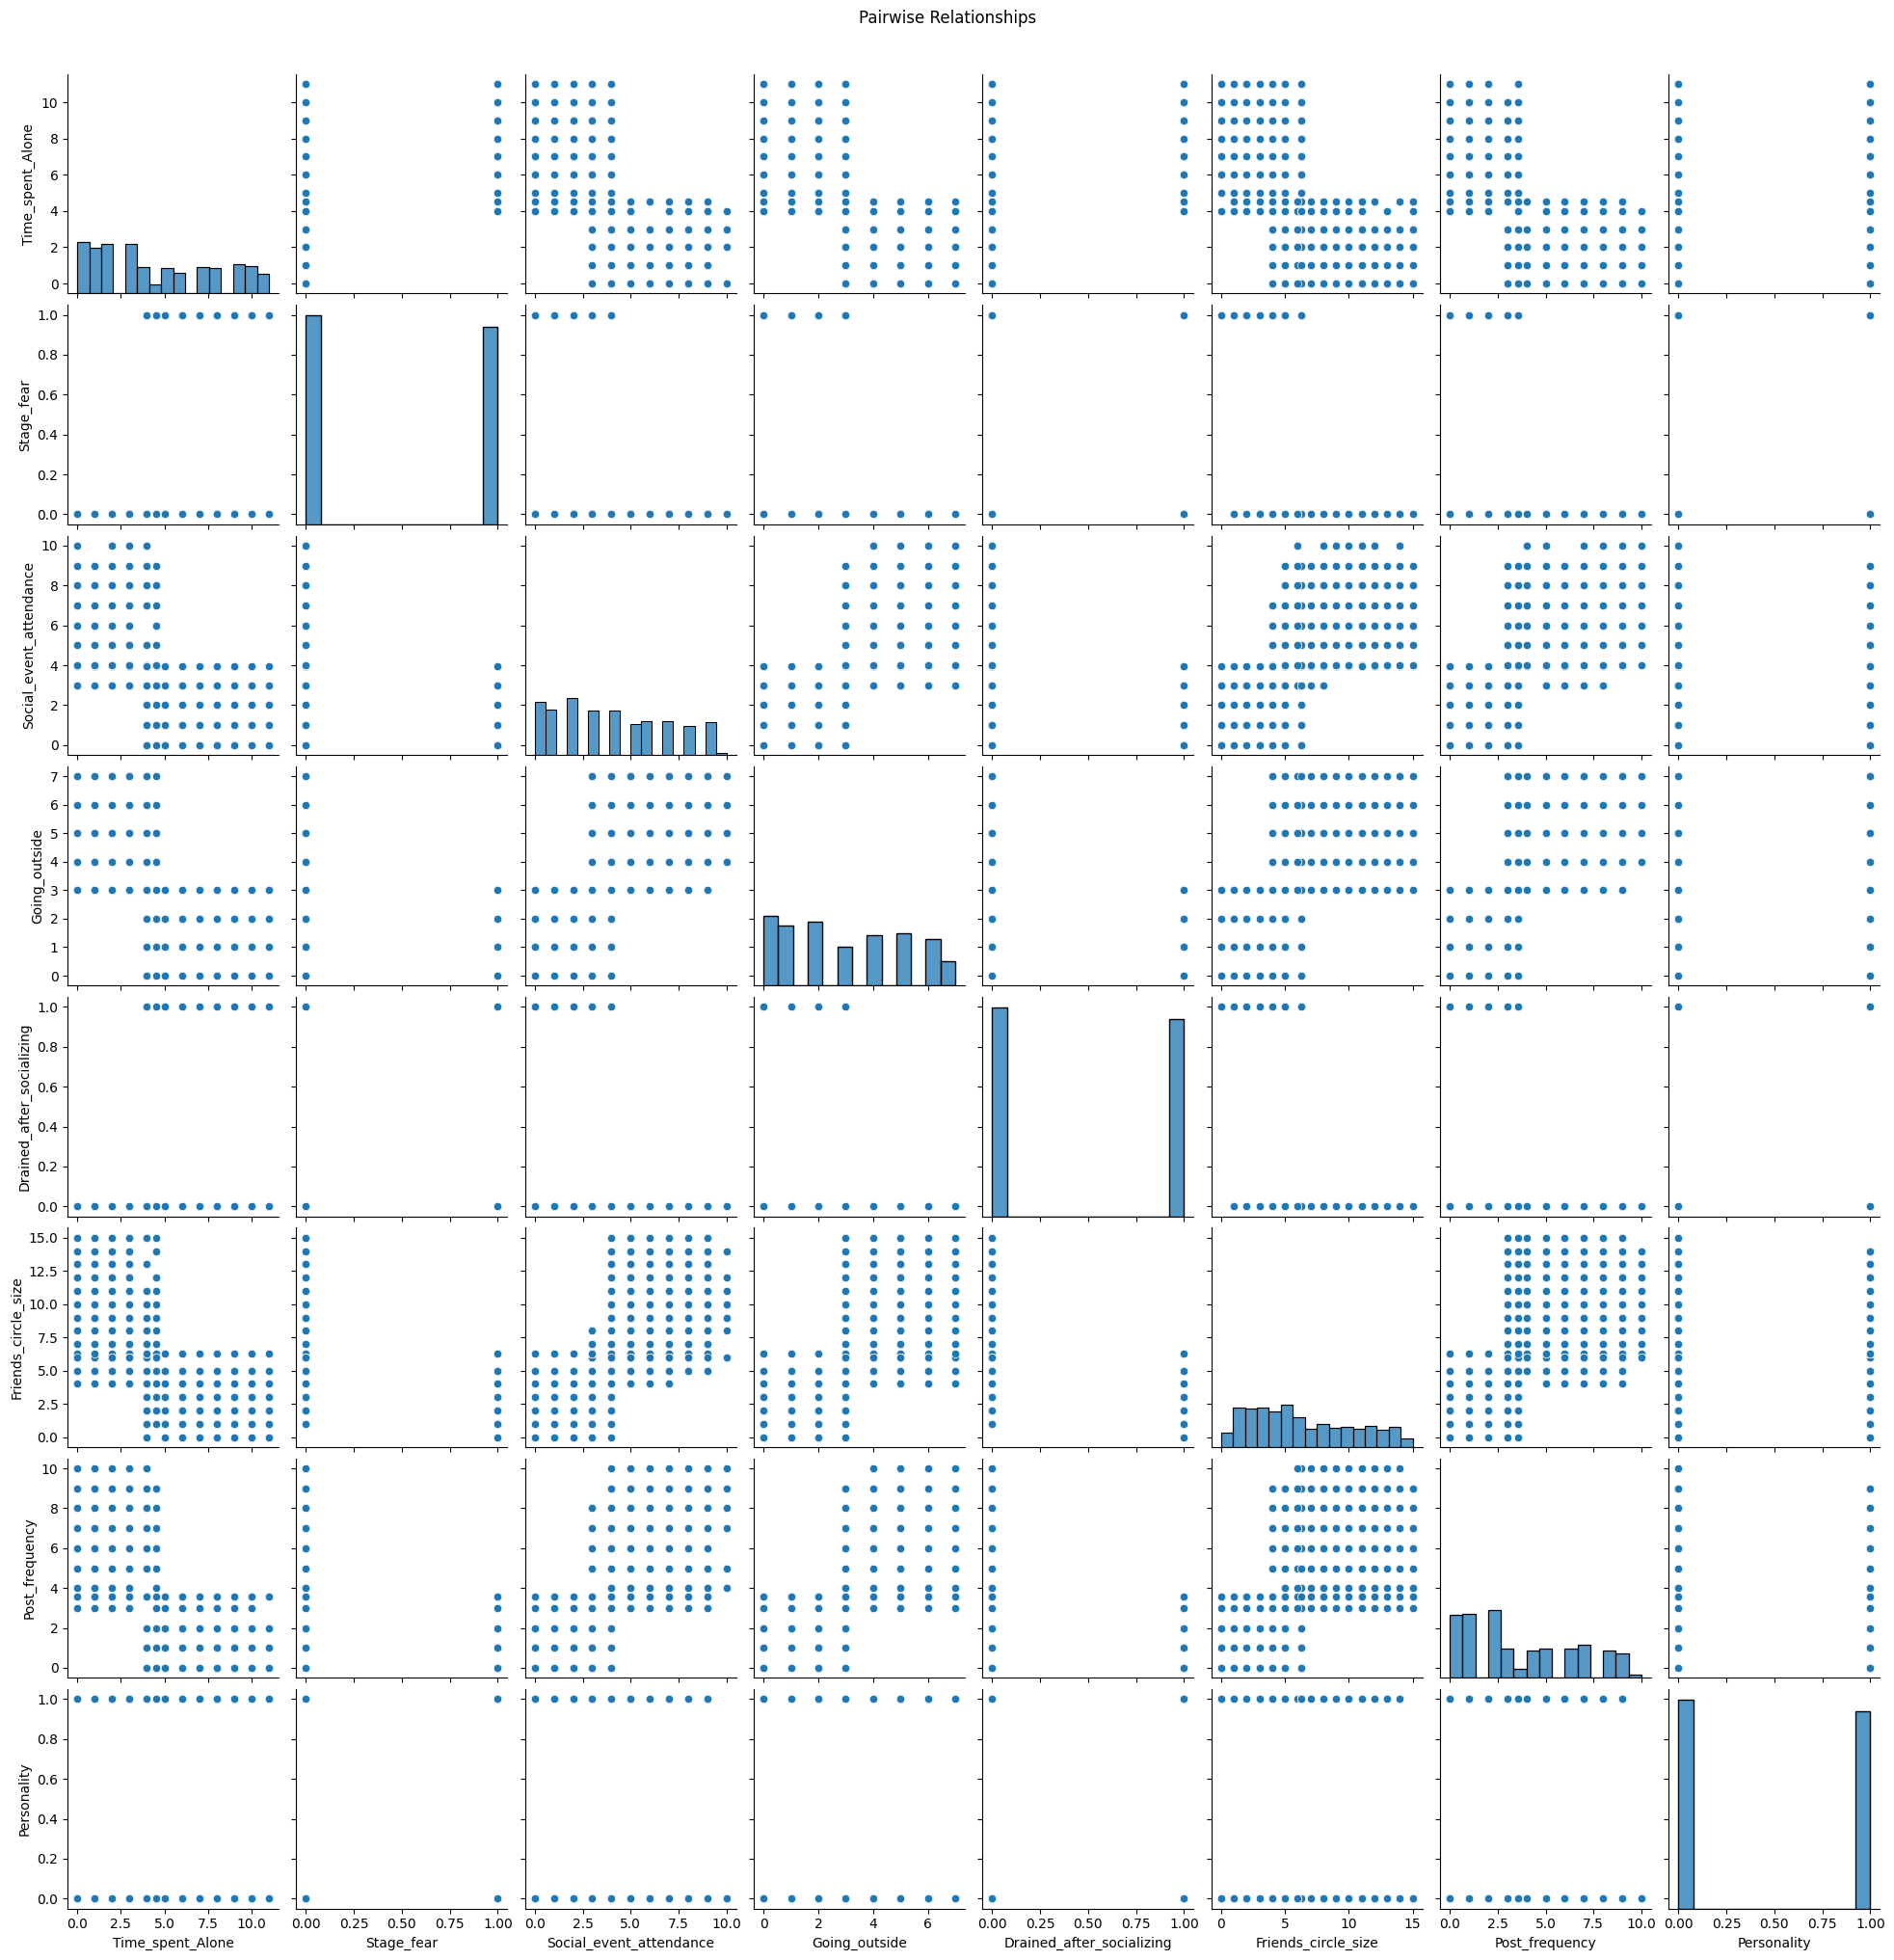

In [19]:
sns.pairplot(df)
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

## Train models

### Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr_scaled= LogisticRegression()
lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled_df, y_train)
y_pred_lr= lr.predict(x_test)
y_pred_scaled= lr_scaled.predict(x_test_scaled_df)

'''from sklearn.metrics import accuracy_score ,classification_report, confusion_matrix
print("actual " ,accuracy_score(y_test,y_pred_lr))
print("scaled " ,accuracy_score(y_test,y_pred_scaled))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))'''

'from sklearn.metrics import accuracy_score ,classification_report, confusion_matrix\nprint("actual " ,accuracy_score(y_test,y_pred_lr))\nprint("scaled " ,accuracy_score(y_test,y_pred_scaled))\nprint("\nClassification Report:\n", classification_report(y_test, y_pred))\nprint("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))'

## KNN

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_scaled_df, y_train)
y_pred_knn = knn.predict(x_test_scaled_df)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

KNN Accuracy: 0.9264367816091954


## SVM

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score ,classification_report, confusion_matrix

svm = SVC(kernel='rbf')  # 'linear' or 'rbf'
svm.fit(x_train_scaled_df, y_train)
y_pred_svm = svm.predict(x_test_scaled_df)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))  # for binary: specify `pos_label` if needed
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.9333333333333333
Accuracy: 0.9333333333333333
Precision: 0.9181818181818182
Recall: 0.9483568075117371
F1 Score: 0.9330254041570438
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.93       444
           1       0.92      0.95      0.93       426

    accuracy                           0.93       870
   macro avg       0.93      0.93      0.93       870
weighted avg       0.93      0.93      0.93       870



### Comparing 3 models

In [23]:
def evaluate_model(name, y_true, y_pred):
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred)
    }

results = []

results.append(evaluate_model("Logistic Regression", y_test, y_pred_lr))
results.append(evaluate_model("K-Nearest Neighbors", y_test, y_pred_knn))
results.append(evaluate_model("SVM (RBF Kernel)", y_test, y_pred_svm))

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Round for clarity
results_df = results_df.round(4)

print(results_df)

                 Model  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression    0.9299     0.9176  0.9413    0.9293
1  K-Nearest Neighbors    0.9264     0.9132  0.9390    0.9259
2     SVM (RBF Kernel)    0.9333     0.9182  0.9484    0.9330


### Hyperparamter tning

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(x_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score: 0.9349753694581281


In [25]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score ,classification_report, confusion_matrix

svm = SVC(kernel='rbf')  # 'linear' or 'rbf'
svm.fit(x_train_scaled_df, y_train)
y_pred_svm = svm.predict(x_test_scaled_df)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Accuracy: 0.9333333333333333


In [ ]:
import joblib

# Example: model is your trained model
joblib.dump(svm, "my_project.pkl")
print("saved")

saved
